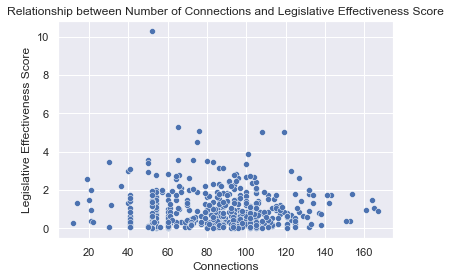

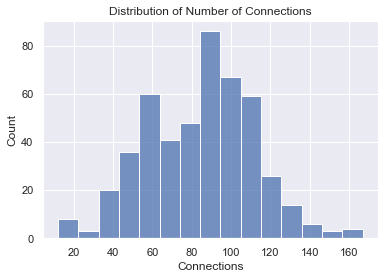

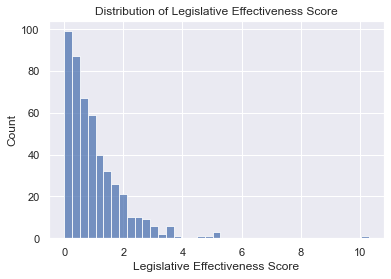

In [1]:
"""
Name: analysis.ipynb
Author: Lynette Dang

Initial findings (in Jupyter Notebook)
"""

import scipy.stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot

df_analysis = pd.read_csv("analysis_conn.csv")

x = np.array(df_analysis["Connections"])
y = np.array(df_analysis["Legislative Effectiveness Score"])
 
df = [['Pearson Correlation',  scipy.stats.pearsonr(x, y)[0], scipy.stats.pearsonr(x, y)[1]],
          ['Spearman Correlation', scipy.stats.spearmanr(x, y)[0], scipy.stats.spearmanr(x, y)[1]]]

df = pd.DataFrame(
    df, columns=['Test', 'correlation coefficient', 'p_value']);
sns.set_theme();
sns.scatterplot(
    data=df_analysis, x="Connections", y="Legislative Effectiveness Score").set(title='Relationship between Number of Connections and Legislative Effectiveness Score')
plot.show()
sns.histplot(data=df_analysis, x="Connections").set(title='Distribution of Number of Connections')
plot.show()
plot.show()
sns.histplot(
    data=df_analysis, x="Legislative Effectiveness Score").set(title='Distribution of Legislative Effectiveness Score')
plot.show()

In [143]:
import networkx as nx
import matplotlib.pyplot as plt
import json
from collections import Counter
from operator import itemgetter 
df_analysis = pd.read_csv("analysis_ind.csv")
df_analysis = df_analysis[['Legislator name','Connections','Legislative Effectiveness Score']]

In [42]:
import networkx as nx
import matplotlib.pyplot as plt
import json
from collections import Counter
from operator import itemgetter 
with open('ind_network.json') as json_file:
    network = json.load(json_file)
g = nx.DiGraph()
g.add_nodes_from(network.keys())
for k, v in network.items():
    g.add_edges_from(([(k, t) for t in v if (t, k) not in g.edges()]))

In [43]:
print(nx.info(g))

DiGraph with 555 nodes and 20610 edges


In [124]:
nx.density(g)

0.08769509831644723

In [125]:
nx.average_clustering(g)

0.0

In [101]:
bc = nx.betweenness_centrality(g, normalized=True, endpoints=True)
bc_top10 = sorted(bc.items(), key = itemgetter(1), reverse = True)[:10]
bc_top100 = [key for key, value in sorted(bc.items(), key=lambda x: x[1], reverse= True)][:100]

In [51]:
ec = nx.eigenvector_centrality_numpy(g, max_iter=500)
ec_top10 = sorted(ec.items(), key = itemgetter(1), reverse = True)[:10]
ec_top100 = [key for key, value in sorted(ec.items(), key=lambda x: x[1], reverse= True)][:100]

In [52]:
cc = nx.closeness_centrality(g)
cc_top10 = sorted(cc.items(), key = itemgetter(1), reverse = True)[:10]
cc_top100 = [key for key, value in sorted(cc.items(), key=lambda x: x[1], reverse= True)][:100]

In [53]:
dc = nx.degree_centrality(g)
dc_top10 = sorted(dc.items(), key = itemgetter(1), reverse = True)[:10]
dc_top100 = [key for key, value in sorted(dc.items(), key=lambda x: x[1], reverse= True)][:100]

In [54]:
data = pd.DataFrame(bc_top10, columns=['name', 'value'])
print("Betweenness Centrality Top 10")
data

Betweenness Centrality Top 10


,name,value
0,David Trone,0.032899
1,Rodney Davis,0.018453
2,Tom Udall,0.018051
3,Richard Shelby,0.016613
4,Amy Klobuchar,0.014978
5,G.K. Butterfield,0.014060
6,Susan Davis,0.013178
7,Carolyn B. Maloney,0.012992
8,Zoe Lofgren,0.012756
9,Rob Portman,0.012499


In [55]:
data = pd.DataFrame(ec_top10, columns=['name', 'value'])
print("Eigenvector Centrality Top 10")
data

Eigenvector Centrality Top 10


,name,value
0,Mike Kelly,0.415024
1,Drew Ferguson,0.357190
2,Darin LaHood,0.307449
3,Vern Buchanan,0.264573
4,Brian Babin,0.262779
5,Conor Lamb,0.242747
6,Ron Estes,0.227705
7,Mike Garcia,0.226161
8,Jason Smith,0.209523
9,Randy Weber,0.194645


In [56]:
data = pd.DataFrame(cc_top10, columns=['name', 'value'])
print("Closeness Centrality Top 10")
data

Closeness Centrality Top 10


,name,value
0,Lloyd Doggett,0.460427
1,Donald Sternoff Beyer Jr.,0.456228
2,Brian Babin,0.440947
3,Mike Garcia,0.439657
4,Randy Weber,0.438368
5,Jason Smith,0.437103
6,Eddie Bernice Johnson,0.435792
7,Lizzie Pannill Fletcher,0.434505
8,Daniel Lipinski,0.431935
9,Conor Lamb,0.430007


In [57]:
data = pd.DataFrame(dc_top10, columns=['name', 'value'])
print("Degree Centrality Top 10")
data

Degree Centrality Top 10


,name,value
0,Stephen Lynch,0.272563
1,Salud Carbajal,0.259928
2,Alma Adams,0.258123
3,Anthony G. Brown,0.254513
4,Mark DeSaulnier,0.252708
5,Stacey Plaskett,0.240072
6,William Lacy Clay,0.236462
7,Steve Cohen,0.234657
8,Dina Titus,0.232852
9,Brad Sherman,0.231047


In [58]:
len(set(bc_top100).union(set(ec_top100)).union(set(cc_top100)).union(dc_top100))

251

In [136]:
bc_df = pd.DataFrame.from_dict(bc, orient='index')
bc_df.reset_index(inplace=True)
bc_df = bc_df.rename(columns={"index": "index", 0: " bc"})
ec_df = pd.DataFrame.from_dict(ec, orient='index')
ec_df.reset_index(inplace=True)
ec_df = ec_df.rename(columns={"index": "index", 0: " ec"})
dc_df = pd.DataFrame.from_dict(dc, orient='index')
dc_df.reset_index(inplace=True)
dc_df = dc_df.rename(columns={"index": "index", 0: " dc"})
cc_df = pd.DataFrame.from_dict(cc, orient='index')
cc_df.reset_index(inplace=True)
cc_df = cc_df.rename(columns={"index": "index", 0: " cc"})

In [132]:
def merge(df1, df2):
    df1 = (
        df1.merge(df2,
            left_on=['Legislator name'],
            right_on=['index'],
            how='left')
    )
    return df1

In [137]:
df_analysis = merge(df_analysis, bc_df)
df_analysis = merge(df_analysis, ec_df)
df_analysis = merge(df_analysis, cc_df)
df_analysis = merge(df_analysis, dc_df)

In [141]:
df_analysis = df_analysis.drop(columns=['index_x', 'index_y', 'index_x', 'index_y'])

In [142]:
df_analysis 

,Legislator name,Connections,Legislative Effectiveness Score,bc,ec,cc,dc
0,Jack Reed,"['Kirsten Gillibrand', 'Tammy Duckworth', 'Joe...",0.346327,0.001776,-4.538188e-19,0.000000,0.117329
1,Kirsten Gillibrand,"['Jack Reed', 'Tammy Duckworth', 'Joe Manchin ...",0.338763,0.001780,-9.681299e-19,0.001805,0.108303
2,Tammy Duckworth,"['Jack Reed', 'Kirsten Gillibrand', 'Joe Manch...",1.529729,0.001784,3.328542e-19,0.003610,0.115523
3,Gary Peters,"['Jack Reed', 'Kirsten Gillibrand', 'Tammy Duc...",5.015463,0.002253,6.147937e-19,0.007220,0.119134
4,Elizabeth Warren,"['Jack Reed', 'Kirsten Gillibrand', 'Tammy Duc...",0.725357,0.001796,2.142968e-18,0.009025,0.111913
...,...,...,...,...,...,...,...
476,Gary Palmer,"['Peter DeFazio', 'Grace Napolitano', 'Donald ...",1.086954,0.001707,1.486364e-01,0.398346,0.117329
477,Randy Weber,"['Peter DeFazio', 'Grace Napolitano', 'Donald ...",0.069581,0.001724,1.946450e-01,0.438368,0.171480
478,Brian Babin,"['Peter DeFazio', 'Grace Napolitano', 'Donald ...",0.562175,0.001724,2.627787e-01,0.440947,0.171480
479,John A. Yarmuth,"['Robert C. Scott', 'Jan Schakowsky', 'David P...",1.223520,0.001727,8.357214e-02,0.412778,0.055957


In [144]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(interaction_only=True,include_bias = False)